
Part 1:

*** MEMORY ERROR ON RUN NUMBER 15 , USING DATA FROM 14 RUNS ***
*** RUN TIME TO ERROR: 49.5680148601532 ***


Number of Runs: 14

Expectation Values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



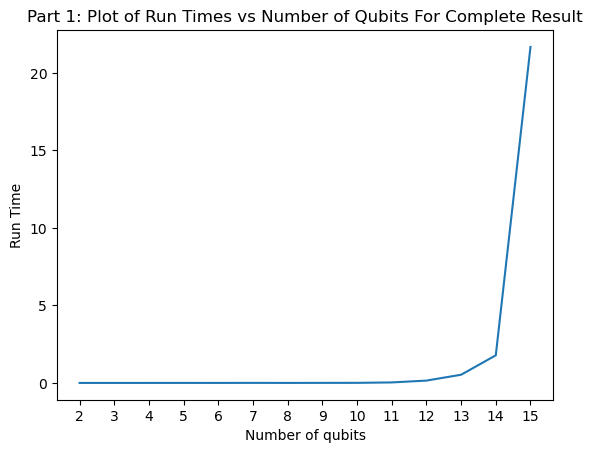


Part 2:

Number of Runs: 14



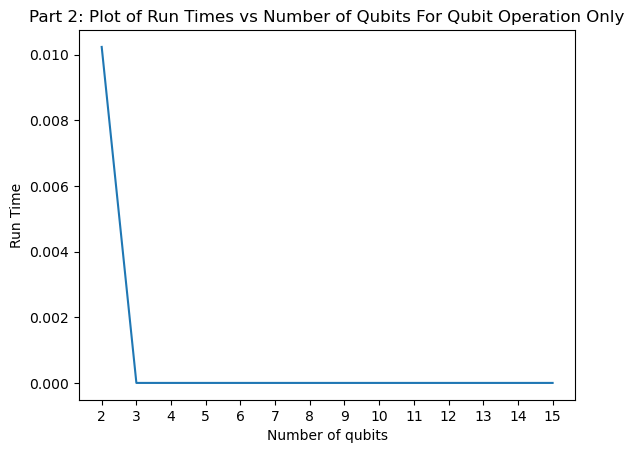

End


In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt

num_qubits = 20

#start with single qubit
qubit = np.array([[1],[0]])

#define the operators
x_oper = np.array([[0,1],[1,0]])   # X

had_oper = np.array([[1,1],[1,-1]]) * (1/np.sqrt(2))   # Hadamard (H)

cnot_oper = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])   # CNOT

ident_oper = np.array([[1,0],[0,1]])   # Identity (I)

##################################  ***  PART 1  ***
print()
print("Part 1:")

expect_value = np.array([[1]])  #Expectation values matrix
#print(expect_value.shape)

# CNOT requires 2 qubits to act on so we'll create a uniform set of 2 qubits to start

psi = np.kron(qubit, qubit)   # |0>|0>

runtime = np.array([])   # initialize runtime array for Part 1

start_time = time.time()

oper_1 = np.kron(had_oper, x_oper)  # tensor product of H and X to act on first two bits

oper_2 = cnot_oper   # To start, oper_2 will grow as we add mor qubits

res_1_1_1 = np.matmul(oper_1, psi) # result of H and X on state vector

res_1_1_2 = np.matmul(oper_2, res_1_1_1)  # rsult of CNOT on resulting bits

end_time = time.time()
exec_time = end_time - start_time
runtime = np.concatenate((runtime, [exec_time])) # run #1 entry

exp_value = np.tensordot(psi, res_1_1_2, axes=(0,0)) # expectation value of run #1
      
expect_value[0:1] = exp_value[0:1]  # assign expectation value to first matrix entry

num_runs = 1

num_reps = num_qubits - 2  # number of times through the loop to add more bits
for i in range(num_reps):     # Remember i starts at 0 here
    try:
        start_time = time.time()

        next_oper_1 = np.kron(had_oper, oper_1)  # create larger tensor product of initial operator

        next_oper_2 = np.kron(ident_oper, oper_2) # create larger product of 2nd operator

        next_psi = np.kron(qubit, psi)   # tensor product with added qubit

        res_1_2_1 = np.matmul(next_oper_1, next_psi)  # result of 1st operator on larger qubit

        res_1_2_2 = np.matmul(next_oper_2, res_1_2_1)  # result of 2nd operator on larger qubit

        end_time = time.time()
        exec_time = end_time - start_time
        runtime = np.concatenate((runtime, [exec_time]))
        
        exp_value = np.tensordot(next_psi, res_1_2_2, axes=(0,0))  # new expectation value
        expect_value = np.concatenate((expect_value, exp_value))  # add to matrix

        num_runs += 1
               
        # assign new values to the older variables
        psi = next_psi
        oper_1 = next_oper_1
        oper_2 = next_oper_2
        
    except MemoryError:    # break here if we run into a memory issue
        end_time = time.time()
        exec_time = end_time - start_time
        print()
        print("*** MEMORY ERROR ON RUN NUMBER", (num_runs + 1), ", USING DATA FROM", num_runs, "RUNS ***")
        print("*** RUN TIME TO ERROR:", exec_time, "***")
        print()
        # reset variables (just for debug)
        next_psi = psi
        next_oper_1 = oper_1
        next_oper_2 = oper_2
        break
        
num_qubits_array = np.arange(2, num_runs + 2, 1)

final_num_qubits = num_runs + 1

print()
print("Number of Runs:", num_runs)
print()
print("Expectation Values:", expect_value.flatten())
print()

# PLOTTING
plt.title("Part 1: Plot of Run Times vs Number of Qubits For Complete Result") 
plt.xlabel("Number of qubits") 
plt.ylabel("Run Time") 
plt.plot(num_qubits_array, runtime)
plt.xticks(num_qubits_array)
plt.show()


##################################  ***  PART 2  ***
print()
print("Part 2:")

# Declare new variables for Part 2
qubit2 = np.array([[1.],[0.]])

flat_qubit2 = qubit2.flatten()  # create qubit row vector

psi2 = np.array([0. ,0.])  # Initialize row state vector

psi2[0:2] = flat_qubit2[0:2]  # Assign LSB to first two slots

runtime2 = np.array([])  # runtime for Part 2
start_time = time.time()

mod_ent = np.tensordot(had_oper, psi2[0:2], axes=(1,0)) # tensor dot product of H and row vector

psi2[0:2] = mod_ent[0:2]  # reassign LSB to modified value

psi2 = np.append(psi2, flat_qubit2)  # Add new qubit

mod_ent = np.tensordot(x_oper, psi2[2:4], axes=(1,0))  # Perform X on 2nd qubit

psi2[2:4] = mod_ent[0:2]  # reassign result of X operation

#Must use kron to get psi in correct form for CNOT
col1 = np.reshape(psi2[0:2],(2,1))  #form column vector on LSB
col2 = np.reshape(psi2[2:4],(2,1))  #form column vector on next qubit

newpsi = np.kron(col1, col2) # tensor product of first two qubits

finx = np.matmul(cnot_oper, newpsi)  # CNOT on first 2 qubits

flat_finx = finx.flatten()  # reshape to row vector

psi2[0:4] = flat_finx[0:4]  # reassign state vector to flattened values

end_time = time.time()

exec_time = end_time - start_time
runtime2 = np.concatenate((runtime2, [exec_time]))

num_runs2 = 1

num_reps = final_num_qubits - 2
for i in range(0, num_reps):
    try:
        start_time = time.time()
        
        #tensor product of H with new qubit
        new_ent = np.tensordot(had_oper, flat_qubit2, axes=(1,0)) 
        
        next_psi2 = np.append(new_ent, psi2)  #append new entry to state vector

        #same as before
        end_time = time.time()
        exec_time = end_time - start_time
        runtime2 = np.concatenate((runtime2, [exec_time]))

        num_runs2 += 1
        
        psi2 = next_psi2  # reassign state vector to old variable
    except MemoryError:
        end_time = time.time()
        exec_time = end_time - start_time
        print()
        print("*** MEMORY ERROR ON RUN NUMBER", (num_runs2 + 1), ", USING DATA FROM", num_runs2, "RUNS ***")
        print("*** RUN TIME TO ERROR:", exec_time, "***")
        print()
        next_psi2 = psi2   # just for debug
        break

print()
print("Number of Runs:", num_runs2)
print()

# PLOTTING
plt.title("Part 2: Plot of Run Times vs Number of Qubits For Qubit Operation Only") 
plt.xlabel("Number of qubits") 
plt.ylabel("Run Time") 
plt.plot(num_qubits_array, runtime2)
plt.xticks(num_qubits_array)
plt.show()

print("End")

